In [62]:
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from sklearn.model_selection import KFold

In [63]:
from keras.datasets import mnist
from keras.datasets import cifar10

In [110]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()
imageDir = "dataset/all"
localImages = []
for filename in os.listdir(imageDir):
    localImage = mpimg.imread(os.path.join(imageDir, filename))
    if (filename is not None):
        localImages.append(localImage)
        
localImages = np.array(localImages)

X = localImages[:20]
print (X.shape)


(20, 960, 640, 3)
(20, 960, 640, 3)


In [1]:
def plotImage(X):
    plt.figure(figsize=(10,10))
    plt.imshow(X)
    plt.show()
    plt.close()

plotImage(X[1, :])


NameError: name 'X' is not defined

In [21]:
Xtr.shape

(60000, 28, 28)

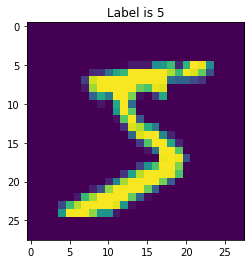

In [22]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


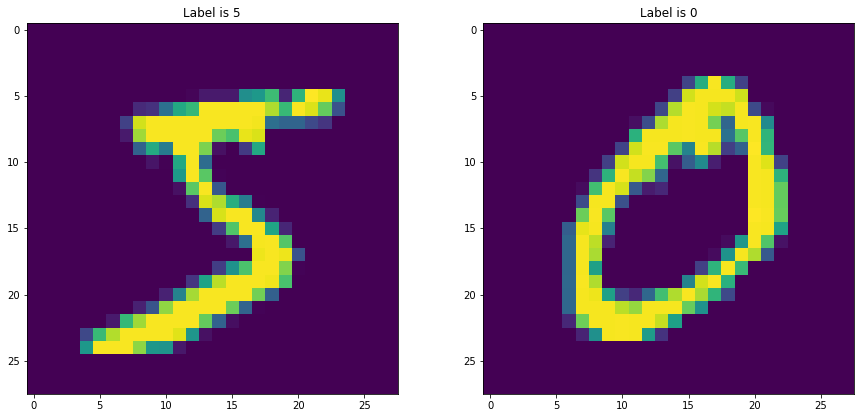

In [23]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [24]:
28*28

784

In [25]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [26]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [27]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.2649
